Introdução ao conceito de Machine Learning e suas aplicações.

importação das bibliotecas

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### pandas

In [186]:
# carregamento dos data frames
df_excel = pd.read_excel("Chess.xlsx", sheet_name="Chess")
df_csv = pd.read_csv("https://raw.githubusercontent.com/FIAP/Pos_Tech_DTAT/" \
"61a634996879d5c1384af6f567e29659ad68b727/Aula%2002/Base%20de%20Dados/Tomato.csv", sep=",")

In [187]:
# leitura do df_excel usando a função head() que mostra por padrão as 5 primeiras linhas
df_excel.head()

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
0,False,1.504210e+17,1.504210e+17,13,outoftime,white,15+2,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,5
1,True,1.504130e+17,1.504130e+17,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,1.504130e+17,1.504130e+17,61,mate,white,5+10,ischia,1496,a-00,1500,C20,King's Pawn Game: Leonardis Variation,3
3,True,1.504110e+17,1.504110e+17,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,True,1.504030e+17,1.504030e+17,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,C41,Philidor Defense,5


In [188]:
# leitura do df_csv usando a função tail() que mostra por padrão as últimas 5 linhas
df_csv.tail()

,Date,Unit,Minimum,Maximum,Average,Market
2736,2021-05-09,Kg,10,15,12.5,Tomato
2737,2021-05-10,Kg,10,15,12.5,Tomato
2738,2021-05-11,Kg,10,15,12.5,Tomato
2739,2021-05-12,Kg,30,35,32.5,Tomato
2740,2021-05-13,Kg,35,40,37.5,Tomato


In [189]:
# usa o atributo shape para mostrar a quantidade de linhas e colunas do df_csv
df_csv.shape

(2741, 6)

In [190]:
# usa a função info para verificar o tipo de dado de cada coluna do df_excel
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rated           20058 non-null  bool   
 1   created_at      20058 non-null  float64
 2   last_move_at    20058 non-null  float64
 3   turns           20058 non-null  int64  
 4   victory_status  20058 non-null  object 
 5   winner          20058 non-null  object 
 6   increment_code  20058 non-null  object 
 7   white_id        20058 non-null  object 
 8   white_rating    20058 non-null  int64  
 9   black_id        20058 non-null  object 
 10  black_rating    20058 non-null  int64  
 11  opening_eco     20058 non-null  object 
 12  opening_name    20058 non-null  object 
 13  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 2.0+ MB


In [191]:
# usa a função describe para obter estatísticas descritivas do df_csv
df_csv.describe()

,Minimum,Maximum,Average
count,2741.000000,2741.000000,2741.000000
mean,35.089748,41.281284,38.185516
std,16.648425,17.364135,16.970949
min,8.000000,12.000000,10.000000
25%,22.000000,30.000000,25.000000
50%,30.000000,38.000000,35.000000
75%,45.000000,50.000000,47.500000
max,115.000000,120.000000,117.500000


In [192]:
# usa o atributo T para transpor o resultado da função describe
df_csv.describe().T

,count,mean,std,min,25%,50%,75%,max
Minimum,2741.0,35.089748,16.648425,8.0,22.0,30.0,45.0,115.0
Maximum,2741.0,41.281284,17.364135,12.0,30.0,38.0,50.0,120.0
Average,2741.0,38.185516,16.970949,10.0,25.0,35.0,47.5,117.5


In [193]:
# usa a função head para visualizarmos as colunas e posteriormente selecionarmos uma coluna específica
df_excel.head()

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
0,False,1.504210e+17,1.504210e+17,13,outoftime,white,15+2,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,5
1,True,1.504130e+17,1.504130e+17,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,1.504130e+17,1.504130e+17,61,mate,white,5+10,ischia,1496,a-00,1500,C20,King's Pawn Game: Leonardis Variation,3
3,True,1.504110e+17,1.504110e+17,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,True,1.504030e+17,1.504030e+17,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,C41,Philidor Defense,5


In [194]:
# usa a função set para verificar os valores únicos da coluna "victory_status" do df_excel
set(df_excel["victory_status"])

{'draw', 'mate', 'outoftime', 'resign'}

In [195]:
# usa a função head() para mostrar as primeiras linhas do df_csv para posteriormente criar uma nova coluna
df_csv.head()

,Date,Unit,Minimum,Maximum,Average,Market
0,2013-06-16,Kg,26,32,29.0,Tomato
1,2013-06-17,Kg,20,25,22.5,Tomato
2,2013-06-18,Kg,22,26,24.0,Tomato
3,2013-06-19,Kg,24,28,26.0,Tomato
4,2013-06-20,Kg,22,26,24.0,Tomato


In [196]:
# cria a função para classificar o tamanho do tomate com base na media
def categorizar_media_tomate(media):
  if media >= 40 and media <= 70:
    return "tomate medio"
  elif media < 40:
    return "tomate pequeno"
  else:
    return "tomatao"

In [197]:
# cria uma nova coluna no df usando com base a Average e a função categorizar_media_tomate em cima dessa coluna
df_csv["categoria_tomate"] = df_csv["Average"].apply(categorizar_media_tomate)

In [198]:
# visualiza o df com a nova coluna criada
df_csv.head()

,Date,Unit,Minimum,Maximum,Average,Market,categoria_tomate
0,2013-06-16,Kg,26,32,29.0,Tomato,tomate pequeno
1,2013-06-17,Kg,20,25,22.5,Tomato,tomate pequeno
2,2013-06-18,Kg,22,26,24.0,Tomato,tomate pequeno
3,2013-06-19,Kg,24,28,26.0,Tomato,tomate pequeno
4,2013-06-20,Kg,22,26,24.0,Tomato,tomate pequeno


In [199]:
# valida quais foram os valores da coluna criada
df_csv.groupby(["categoria_tomate"]).describe()

Minimum                                                      \
                   count       mean       std   min   25%   50%   75%    max   
categoria_tomate                                                               
tomatao            149.0  75.744966  7.324666  65.0  70.0  75.0  80.0  115.0   
tomate medio       954.0  47.818658  8.203065  30.0  40.0  45.0  55.0   65.0   
tomate pequeno    1638.0  23.978022  7.175572   8.0  18.0  25.0  30.0   38.0   

                 Maximum             ...              Average             \
                   count       mean  ...   75%    max   count       mean   
categoria_tomate                     ...                                   
tomatao            149.0  82.583893  ...  85.0  120.0   149.0  79.164430   
tomate medio       954.0  55.009434  ...  60.0   75.0   954.0  51.414046   
tomate pequeno    1638.0  29.528694  ...  35.0   44.0  1638.0  26.753358   

                                                           
                       std   min   25%   50%   75%    max  
categoria_tomate                                           
tomatao           7.367396  70.5  75.0  77.5  82.5  117.5  
tomate medio      8.272792  40.0  45.0  50.0  57.5   70.0  
tomate pequeno    7.191735  10.0  21.5  27.5  32.5   39.5  

[3 rows x 24 columns]

In [200]:
# cria a variavel filtro que irá checar a coluna average (média) do dataframe pegando o que for menor que 40 e em seguida, usa o atributo
# loc que irá de fato filtrar o df
filtro = df_csv["Average"] < 40
df_csv.loc[filtro]

,Date,Unit,Minimum,Maximum,Average,Market,categoria_tomate
0,2013-06-16,Kg,26,32,29.0,Tomato,tomate pequeno
1,2013-06-17,Kg,20,25,22.5,Tomato,tomate pequeno
2,2013-06-18,Kg,22,26,24.0,Tomato,tomate pequeno
3,2013-06-19,Kg,24,28,26.0,Tomato,tomate pequeno
4,2013-06-20,Kg,22,26,24.0,Tomato,tomate pequeno
...,...,...,...,...,...,...,...
2736,2021-05-09,Kg,10,15,12.5,Tomato,tomate pequeno
2737,2021-05-10,Kg,10,15,12.5,Tomato,tomate pequeno
2738,2021-05-11,Kg,10,15,12.5,Tomato,tomate pequeno
2739,2021-05-12,Kg,30,35,32.5,Tomato,tomate pequeno


### numpy

In [201]:
# cria a variavel que recebe um array usando a função array do numpy
arr_lista = np.array([1, 2, 3, 4 , 5, 6, 7, 8])

In [202]:
print(arr_lista)

[1 2 3 4 5 6 7 8]


In [203]:
# cria a variavel que recebe array e usa a função zeros do numpy para definir os valores como 0 e passa a quantidade de linhas e colunas
arr_zeros = np.zeros((4, 6))
print(arr_zeros)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [204]:
# cria a variavel que recebe um array de número 1 usando a função ones do numpy e passa a quantidade linhas e colunas do array
arr_ones = np.ones((3, 4))
print(arr_ones)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [205]:
# cria a variavel que recebe valores aleatórios através da função random
arr_random = np.random.rand(3, 4)
print(arr_random)

[[0.41317374 0.68660973 0.02065213 0.35024638]
 [0.23037825 0.43179833 0.10235922 0.64466602]
 [0.9096658  0.89783038 0.0925849  0.02533228]]


In [206]:
# o atributo shape também pode ser usado em um array, para trazer a dimensão do array
print(arr_random.shape)

(3, 4)


In [207]:
# altera o formato do array arr_random usando a função reshape que é parecida com o T
arr_random_reshape = arr_random.reshape((4, 3))
print(arr_random_reshape)

[[0.41317374 0.68660973 0.02065213]
 [0.35024638 0.23037825 0.43179833]
 [0.10235922 0.64466602 0.9096658 ]
 [0.89783038 0.0925849  0.02533228]]


In [208]:
# cria arrays separados para depois concatenar todos
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[5, 6], [7, 8]])
arr3 = np.array([[9, 10], [11, 12]])

In [209]:
arr1

array([[1, 2],
       [3, 4]])

In [210]:
arr4 = np.concatenate((arr1, arr2, arr3), axis=1)
print(arr4)

[[ 1  2  5  6  9 10]
 [ 3  4  7  8 11 12]]


In [211]:
# usa a função split do numpy para separar o array que foi concatenado
arr4_split = np.split(arr4, 2)
print(arr4_split)

[array([[ 1,  2,  5,  6,  9, 10]]), array([[ 3,  4,  7,  8, 11, 12]])]


In [212]:
# usa a função transpose do numpy para inverter as linhas pelas colunas
arr4_transpose = np.transpose(arr4)
print(arr4_transpose)

[[ 1  3]
 [ 2  4]
 [ 5  7]
 [ 6  8]
 [ 9 11]
 [10 12]]


In [213]:
# usa uma segunda forma para transpor o array, usando o T do python, voltando a forma que era antes
arr4_revertido = arr4_transpose.T
print(arr4_revertido)

[[ 1  2  5  6  9 10]
 [ 3  4  7  8 11 12]]


In [214]:
arr_a = np.array([1, 7, 27])
arr_b = np.array([1, 5, 1])

In [215]:
# faz a soma de dois arrays usando a função add do numpy
arr_a_b = np.add(arr_a, arr_b)
arr_a_b

array([ 2, 12, 28])

In [216]:
# faz a soma de dois arrays usando a função add do numpy
arr_sub_a_b = np.subtract(arr_a, arr_b)
arr_sub_a_b

array([ 0,  2, 26])

### matplotlib

In [217]:
df_tomatos = df_csv
df_chess = df_excel

In [218]:
df_tomatos.head()

,Date,Unit,Minimum,Maximum,Average,Market,categoria_tomate
0,2013-06-16,Kg,26,32,29.0,Tomato,tomate pequeno
1,2013-06-17,Kg,20,25,22.5,Tomato,tomate pequeno
2,2013-06-18,Kg,22,26,24.0,Tomato,tomate pequeno
3,2013-06-19,Kg,24,28,26.0,Tomato,tomate pequeno
4,2013-06-20,Kg,22,26,24.0,Tomato,tomate pequeno


In [219]:
df_tomatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              2741 non-null   object 
 1   Unit              2741 non-null   object 
 2   Minimum           2741 non-null   int64  
 3   Maximum           2741 non-null   int64  
 4   Average           2741 non-null   float64
 5   Market            2741 non-null   object 
 6   categoria_tomate  2741 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 150.0+ KB


In [220]:
# converte a coluna date do df para datetime usando a função do pandas
df_tomatos['Date'] = pd.to_datetime(df_tomatos['Date'])

In [221]:
df_tomatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2741 non-null   datetime64[ns]
 1   Unit              2741 non-null   object        
 2   Minimum           2741 non-null   int64         
 3   Maximum           2741 non-null   int64         
 4   Average           2741 non-null   float64       
 5   Market            2741 non-null   object        
 6   categoria_tomate  2741 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 150.0+ KB


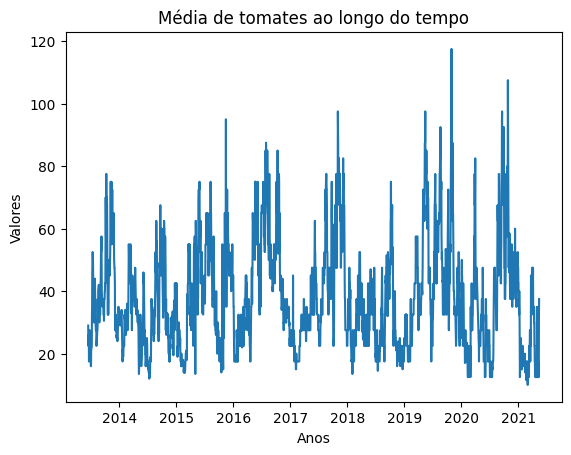

In [222]:
# plota um gráfico usando o matplotlib, passando o primeiro valor para definir o eixo X e o segundo para o eixo Y
plt.plot(df_tomatos["Date"], df_tomatos["Average"])
plt.xlabel("Anos")
plt.ylabel("Valores")
plt.title("Média de tomates ao longo do tempo")
plt.show()


In [223]:
df_chess.head()

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
0,False,1.504210e+17,1.504210e+17,13,outoftime,white,15+2,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,5
1,True,1.504130e+17,1.504130e+17,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,1.504130e+17,1.504130e+17,61,mate,white,5+10,ischia,1496,a-00,1500,C20,King's Pawn Game: Leonardis Variation,3
3,True,1.504110e+17,1.504110e+17,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,True,1.504030e+17,1.504030e+17,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,C41,Philidor Defense,5


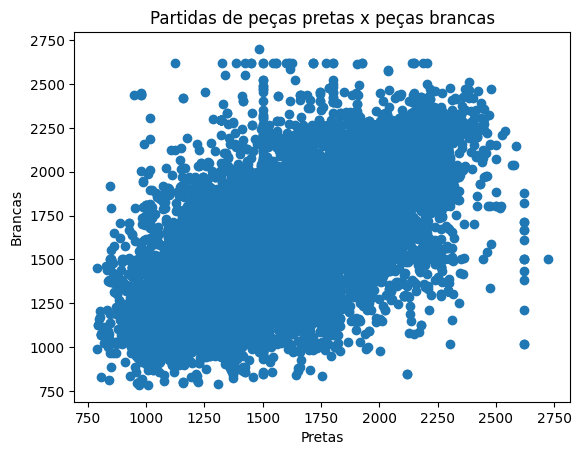

In [224]:
# plota o gráfico de dispersão para mostrar a correlação entre peças pretas e peças brancas em partidas de xadrez
plt.scatter(df_chess['black_rating'], df_chess['white_rating'])
plt.xlabel("Pretas")
plt.ylabel("Brancas")
plt.title("Partidas de peças pretas x peças brancas")
plt.show()

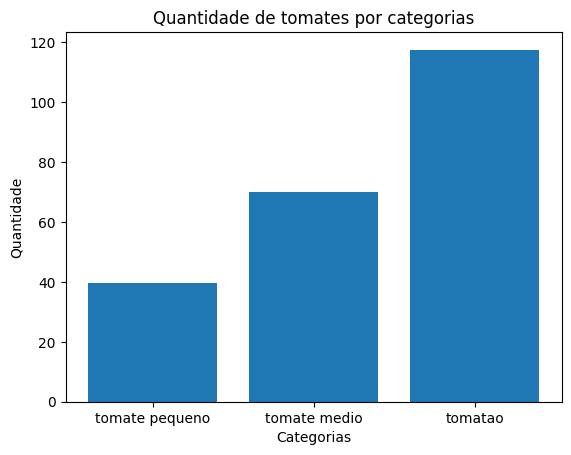

In [225]:
# plota um gráfico de barras para mostrar a quantidade de tomates existentes na base separando cada barra por categoria
plt.bar(df_tomatos["categoria_tomate"], df_tomatos["Average"])
plt.xlabel("Categorias")
plt.ylabel("Quantidade")
plt.title("Quantidade de tomates por categorias")
plt.show()

In [226]:
df_chess.head(3)

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
0,False,1.504210e+17,1.504210e+17,13,outoftime,white,15+2,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,5
1,True,1.504130e+17,1.504130e+17,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,1.504130e+17,1.504130e+17,61,mate,white,5+10,ischia,1496,a-00,1500,C20,King's Pawn Game: Leonardis Variation,3


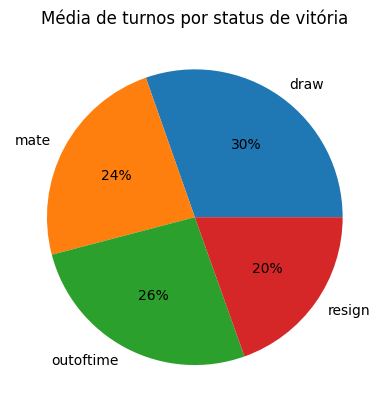

In [227]:
df_chess.groupby("victory_status")["turns"].mean().plot(kind="pie", autopct="%1.0f%%", ylabel="")
plt.title("Média de turnos por status de vitória")
plt.show()


### scikit-learn

In [228]:
df_diabetes = pd.read_csv("https://raw.githubusercontent.com/FIAP/Pos_Tech_DTAT/"
"61a634996879d5c1384af6f567e29659ad68b727/Aula%2002/Base%20de%20Dados/diabetes.csv", sep=',')

In [229]:
df_diabetes.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [230]:
x = df_diabetes.drop(["Class variable"], axis = 1)

In [231]:
x

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [232]:
y = df_diabetes["Class variable"]

In [233]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Class variable, Length: 768, dtype: int64

In [234]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [235]:
x_train

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
8,2,197,70,45,543,30.5,0.158,53
217,6,125,68,30,120,30.0,0.464,32
103,1,81,72,18,40,26.6,0.283,24
654,1,106,70,28,135,34.2,0.142,22
738,2,99,60,17,160,36.6,0.453,21
...,...,...,...,...,...,...,...,...
567,6,92,62,32,126,32.0,0.085,46
413,1,143,74,22,61,26.2,0.256,21
280,0,146,70,0,0,37.9,0.334,28
472,0,119,66,27,0,38.8,0.259,22


In [236]:
len(x_train)

537

In [237]:
df_diabetes.shape

(768, 9)

In [238]:
len(x_test)

231

In [239]:
knn = KNeighborsClassifier(n_neighbors=3)

In [240]:
knn.fit(x_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [241]:
accuracy = knn.score(x_test, y_test)

In [242]:
accuracy

0.7186147186147186